## Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.
#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
#Loading the data
data = np.load('../../solutions/formationchannels.npy')
x = data[:,0]

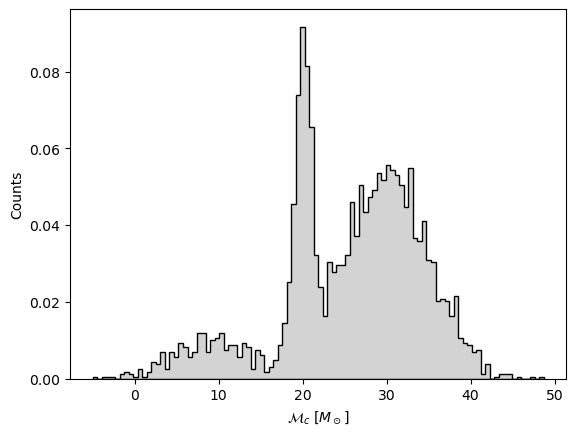

In [3]:
#Histogram of the data
plt.hist(data, bins = 100, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel('Counts')
plt.show()

We can see that there are 3 modes. We can conpute the AIC and BIC to confirm that.

## Model comparison

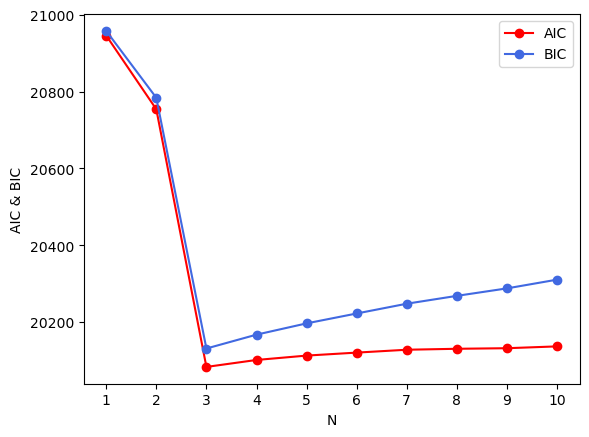

In [4]:
#Compute the AIC and the BIC for a number of components that goes from 1 to 10
aic = np.zeros(10)
bic = np.zeros(10)
N = np.arange(1, 11)
for n in N:
    gm = GaussianMixture(n_components = n, random_state = 42).fit(data)
    aic[n-1] = gm.aic(data)
    bic[n-1] = gm.bic(data)

#Plotting the results
plt.plot(N, aic, color = 'red', marker = 'o', label = 'AIC')
plt.plot(N, bic, color = 'royalblue', marker = 'o', label = 'BIC')
plt.xlabel('N')
plt.ylabel('AIC & BIC')
plt.xticks(N)
plt.legend()
plt.show()

The model with three components is the modt favored

## Gaussian Mixture

In [5]:
#Fit of the data with GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42).fit(data)  #Defining and fitting the model, we are considering three modes

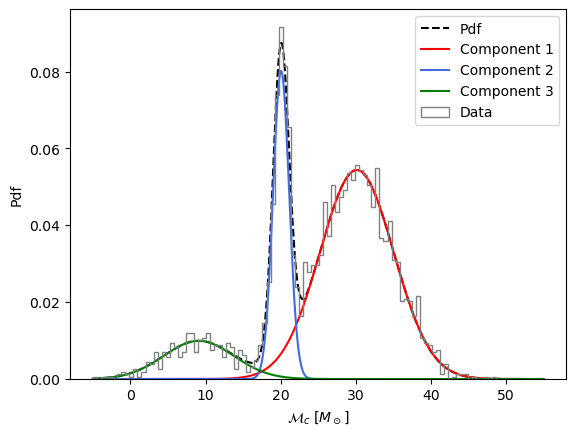

In [6]:
xgrid = np.linspace(-5, 55, 1000000).reshape(-1,1)
prob = gm.predict_proba(xgrid)  #Compute the probability density of each gaussian component for each sample in xgrid
log_like = gm.score_samples(xgrid)  #Compute the log-likelihood of each sample in xgrid
pdf = np.exp(log_like)
single_pdf = prob*(pdf[:, np.newaxis])  #Computing the pdfs of each gaussian component

#Plotting the results
plt.plot(xgrid, pdf, color = 'black', linestyle = 'dashed', label = 'Pdf')
plt.plot(xgrid, single_pdf[:, 0], label = 'Component 1', color = 'red')
plt.plot(xgrid, single_pdf[:, 1], label = 'Component 2', color = 'royalblue')
plt.plot(xgrid, single_pdf[:, 2], label = 'Component 3', color = 'green')
plt.hist(data, bins = 100, density = True, color = 'grey', histtype='step', label = 'Data')
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel('Pdf')
plt.legend()
plt.show()

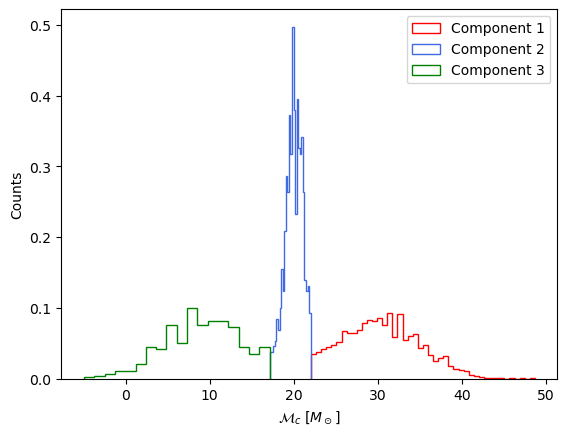

In [7]:
#Histogram of each component individually
labels = gm.fit_predict(data)  #Predict the component of each sample

plt.hist(data[labels==0], bins = int(np.round(len(x[labels==0])**0.5)), density = True, color = 'red', histtype='step', label = 'Component 1')
plt.hist(data[labels==1], bins = int(np.round(len(x[labels==1])**0.5)), density = True, color = 'royalblue', histtype='step', label = 'Component 2')
plt.hist(data[labels==2], bins = int(np.round(len(x[labels==2])**0.5)), density = True, color = 'green', histtype='step', label = 'Component 3')
plt.xlabel(r'$\mathcal{M}_c$ $[M_\odot]$')
plt.ylabel('Counts')
plt.legend()
plt.show()